## PLS (Principal Least Squares Regression)

In [62]:
import pandas as pd
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)

In [63]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [64]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


### Prepare data

In [65]:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [66]:
y = df['Salary']

In [67]:
X = pd.concat([X_, dummies[['League_N', 'Division_E', 'NewLeague_A']]], axis=1)

### Prepare train-test data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [71]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [72]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [ 37.24246339],
       [-14.69680385]])

### PLS Prediction

In [73]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
y_predictions = pls_model.predict(X_train)

#### Train error

In [75]:
np.sqrt(mean_squared_error(y_train, y_predictions))

310.1167593109696

In [76]:
r2_score(y_train, y_predictions)

0.5140424486535482

### Test error

In [77]:
y_predictions_test = pls_model.predict(X_test)

In [78]:
np.sqrt(mean_squared_error(y_test, y_predictions_test))

398.09956327448526

In [79]:
r2_score(y_test, y_predictions_test)

0.2678940112232917

## Model Tuning

In [80]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    cvs = -1 * cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error')
    score = np.sqrt(cvs)
    RMSE.append(score)

### Visualize scores result

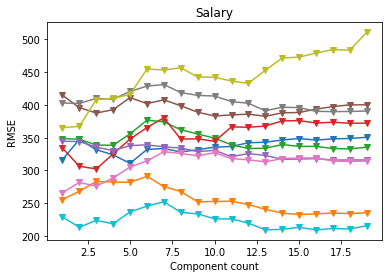

In [81]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v')
plt.xlabel('Component count')
plt.ylabel('RMSE')
plt.title('Salary');

### Optimum variable count is 2

### Create new PLS model with component count 2

In [82]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [83]:
y_predictions = pls_model.predict(X_test)

In [86]:
np.sqrt(mean_squared_error(y_test, y_predictions))

398.09956327448526